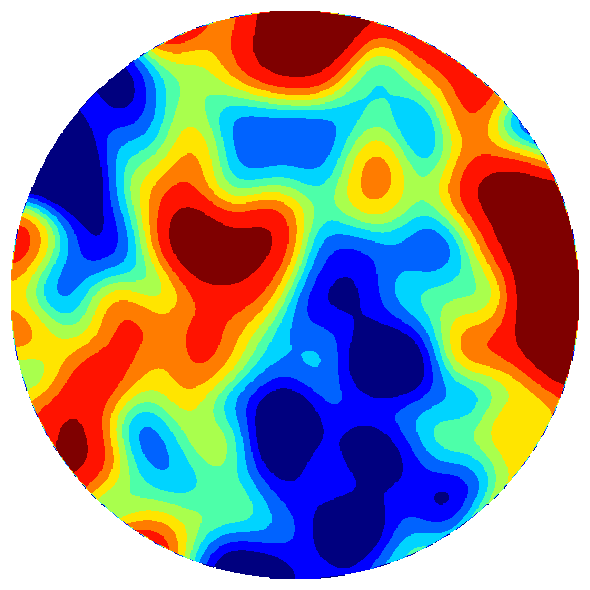

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter

# Parameters
image_size = 512
num_classes = 10
radius = image_size // 2

# Generate coordinate grid
y, x = np.meshgrid(np.linspace(-1, 1, image_size), np.linspace(-1, 1, image_size))
r = np.sqrt(x**2 + y**2)
mask = r <= 1.0

# Create multiple noise patterns and mix them
np.random.seed(42)
noise1 = gaussian_filter(np.random.rand(image_size, image_size), sigma=80)  # Bigger blobs
noise2 = gaussian_filter(np.random.rand(image_size, image_size), sigma=50)
noise3 = gaussian_filter(np.random.rand(image_size, image_size), sigma=25)

# Combine with nonlinear blending (but gently)
combined = (
    0.6 * noise1 +
    0.3 * np.sin(2 * np.pi * noise2) +
    0.1 * np.cos(3 * np.pi * noise3)
)

# Normalize
combined -= combined.min()
combined /= combined.max()

# Quantize using percentiles to ensure equal class presence
flat_vals = combined[mask]
percentile_edges = np.percentile(flat_vals, np.linspace(0, 100, num_classes + 1))
class_labels = np.digitize(combined, bins=percentile_edges[1:-1])
class_labels = np.clip(class_labels, 0, num_classes - 1)

# Mask outside the circle
class_labels[~mask] = -1

# Build colormap (white + jet)
jet_cmap = plt.cm.get_cmap("jet", num_classes)
colors = jet_cmap(np.arange(num_classes))
colors = np.vstack([[[1, 1, 1, 1]], colors])  # Add white for background
cmap = ListedColormap(colors)

# Shift for display (background becomes 0)
display_labels = class_labels + 1

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(display_labels, cmap=cmap, origin='lower')
plt.axis('off')
#plt.title("Smooth Nonlinear 10-Class Blobs (Connected Jet Regions)", fontsize=14)
plt.tight_layout()
plt.show()

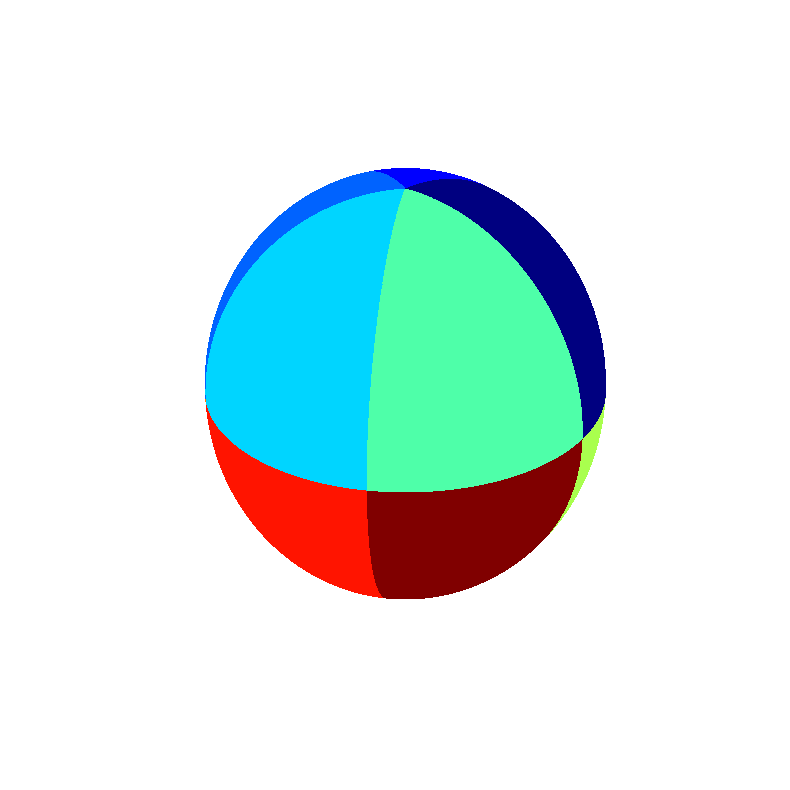

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_classes = 10
u_res, v_res = 200, 100  # azimuthal and elevation resolution
R = 1.0

# Sphere surface coordinates
u = np.linspace(0, 2 * np.pi, u_res)
v = np.linspace(0, np.pi, v_res)
u, v = np.meshgrid(u, v)

# Parametric sphere
X = R * np.sin(v) * np.cos(u)
Y = R * np.sin(v) * np.sin(u)
Z = R * np.cos(v)

# Segment sphere into 10 angular classes (5 top, 5 bottom)
class_labels = np.zeros_like(u, dtype=int)
top_mask = v < (np.pi / 2)
class_labels[top_mask] = (u[top_mask] / (2 * np.pi) * 5).astype(int)
bottom_mask = ~top_mask
class_labels[bottom_mask] = 5 + (u[bottom_mask] / (2 * np.pi) * 5).astype(int)

# Color with jet colormap
colors = plt.cm.get_cmap("jet", num_classes)(class_labels / (num_classes - 1))

# Plot
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, linewidth=0, antialiased=False, shade=False)

# Remove all axis details
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_axis_off()  # Hide all axis panes, grid, ticks
ax.grid(False)
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

plt.tight_layout()
plt.show()

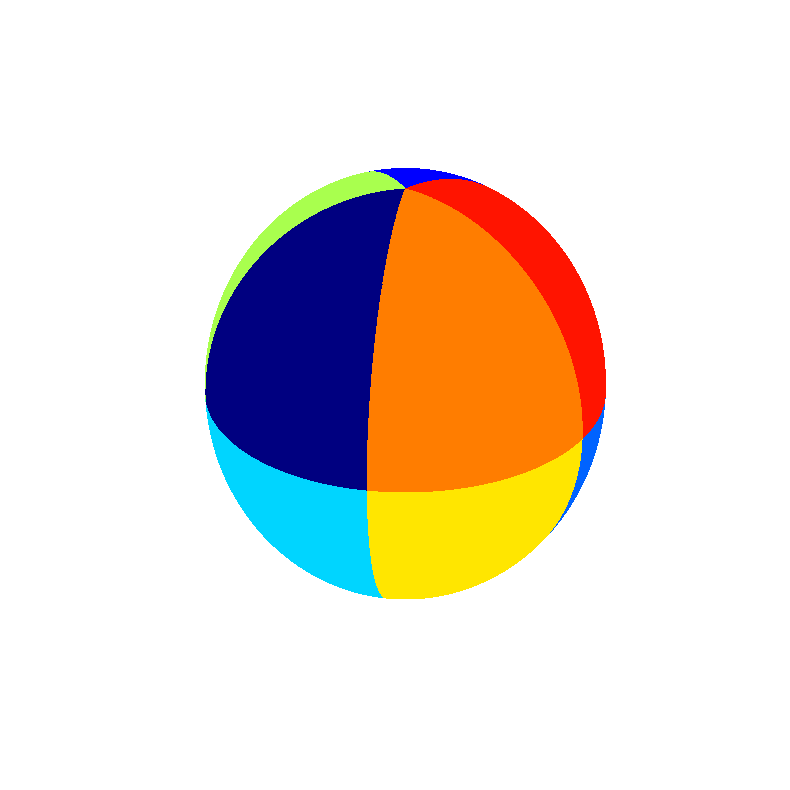

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_classes = 10
u_res, v_res = 200, 100  # azimuthal and elevation resolution
R = 1.0

# Generate spherical surface
u = np.linspace(0, 2 * np.pi, u_res)
v = np.linspace(0, np.pi, v_res)
u, v = np.meshgrid(u, v)

# Parametric equations for the sphere
X = R * np.sin(v) * np.cos(u)
Y = R * np.sin(v) * np.sin(u)
Z = R * np.cos(v)

# Assign class labels based on azimuth, separately for top and bottom hemispheres
class_labels = np.zeros_like(u, dtype=int)

top_mask = v < (np.pi / 2)
bottom_mask = ~top_mask

class_labels[top_mask] = (u[top_mask] / (2 * np.pi) * 5).astype(int)
class_labels[bottom_mask] = 5 + (u[bottom_mask] / (2 * np.pi) * 5).astype(int)

# Ensure class labels are within [0, num_classes - 1]
class_labels = np.clip(class_labels, 0, num_classes - 1)

# Get jet colors and scramble them
jet_colors = plt.cm.get_cmap("jet", num_classes)(np.linspace(0, 1, num_classes))
np.random.seed(42)  # For reproducibility
scrambled_colors = jet_colors.copy()
np.random.shuffle(scrambled_colors)

# Map scrambled colors to class labels
colors = scrambled_colors[class_labels]

# Plot the smooth colored sphere
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='3d', facecolor='white')

ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1,
                linewidth=0, antialiased=False, shade=False)

# Clean white background: no axes, ticks, or grid
ax.set_axis_off()
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for X, Y, Z
plt.tight_layout()
plt.show()